# Homework for statistics module

Rules for code style:
* All the code in this notebook
* Imports are provided in the head of the notebook
* All the cells could be ran in the right order from the top to the bottom
* Commentaries are required
* All the plots should have: title, axis labels and summaries (if necessary)
* Main summaries are provided in cells using markdown **(your analysis of the results and data is very important!!!)**
* Try to use functions and classes to reduce duplicated code blocks to minimum

Also you can use $\LaTeX$ to write formulas. F.e. $\bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i$ or on a new line:
$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i
$$
To do so, you can write anything between $\$ \quad \$$ (or  $ \$\$ \quad\$\$ $).

### Evaluation criteria (100% in total)
## Task 1 (30% max)
1. Requested formulas are provided (5%)
2. All necessary experiments are done (10%)
3. Results are analysed with commentaries (15%)

## Tasks 2.1 и 2.2 (40% max)
1. Visualization and/or simple exploratory data analysis are implemented (5% * 2 tasks)
2. Hypotheses are tested (5% * 2 tasks)
3. Results are analysed with commentaries (10%*2 tasks)

## Task 3 (25% max)
1. Visualization and/or simple exploratory data analysis are implemented (5%)
2. Hypotheses are tested (5%)
3. Data was aggregated properly (5%)
4. Results are analysed with commentaries (10%)

### Extra points (5% max)
1. +5% in case clear, "pythonic" and understandable code style


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('bmh')

from pylab import rcParams

# plots in svg look more precise
%config InlineBackend.figure_format = 'svg'

# Task 1

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city B. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed CBs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

1. Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to strata volumes;
- random selection according to the optimal sub-sampling.

2. Calculate point estimates of the mathematical expectation and variance of the mean value for each data sampling method from p.1, provided:
* Experiments should be conducted for 3 cases (for every method from p.1 each):
     * all strata have the same mat. expectations and variance;
     * strata have different mat. expectations, but the same variance;
     * strata have different mat. expectations and variance.
* For each experiment plot histogram of General Population data (using matplotlib or seaborn packages);
* Plot boxplots for sample mean estimated using each sampling method on a single figure to compare the results. Repeat for each experiment.
* You are provided with `GeneralPopulation` class. It already has all necessary methods for sampling and creating general population as a mixture of strata.
* Your goal is to write functions to conduct experiments and visualize the results.   
* Also provide commentaries as summaries and analysis of results after each visualization.


## Solution for Task 1

### Formulas:

Suppose there are L strata. Let $N_k$ be the number of population elements in the $k^{th}$ stratum. The total population size is

$$ N = \sum_{i=1}^L N_k $$

The overal population mean is

$$
\mu = \sum_{k=1}^{L} W_k\mu_k, \quad \quad W_k = \frac {N_k}{N},
$$

where $W_k$ is the fraction of the population in the $k^{th}$ stratum.

#### Stratified sample point estimations:

Under stratified random sampling, the estimate of $\mu$ is
$$
\overline X_n = \sum_{k=1}^{L} W_k \overline X^{(k)}_{n_k}
$$

The expectation and variance:
$$
E[\overline X^*_n] = \mu
$$

$$
D[\overline X^*_n] = \sum_{k=1}^{L} W^2_k \frac{\sigma^2_k}{n_k}
$$

In our case:
$$
E[\overline X^*_n] = \frac {1}{6} \overline X^{(1)}_{n_1} + \frac {2}{6} \overline X^{(2)}_{n_2} + \frac {3}{6} \overline X^{(3)}_{n_3} = \frac {1}{6} \overline X^{(1)}_{n_1} + \frac {1}{3} \overline X^{(2)}_{n_2} + \frac {1}{2} \overline X^{(3)}_{n_3}
$$
$$
D[\overline X^*_n] = (\frac {1}{6})^2 \frac{\sigma^2_1}{n_1} + (\frac {2}{6})^2 \frac{\sigma^2_2}{n_2} + (\frac {3}{6})^2 \frac{\sigma^2_3}{n_3} = \frac {1}{36} \frac{\sigma^2_1}{n_1} + \frac {1}{9} \frac{\sigma^2_2}{n_2} + \frac {1}{4} \frac{\sigma^2_3}{n_3}
$$

#### Sample volumes if they are sampled proportionally:

Proportional allocation: to choose $n_1, . . . , n_L$ such that
$$
\frac{n_1}{N_1}=\frac{n_2}{N_2}=...=\frac{n_L}{N_L}
$$
This holds if
$$
\tilde{n}_k=n \frac{N_k}{N}=nW_k \quad \quad k=1,...,L
$$
Then:
$$
E[\overline X^*_{n,p}] = \sum_{k=1}^{L} W_k \overline X^{(k)}_{\tilde n_k} = \sum_{k=1}^{L} W_k \frac {1}{{\tilde n_k}} \sum_{i=1}^{\tilde n_k} X_i^{(k)} = \frac {1}{n} \sum_{k=1}^L \sum_{i=1}^{{\tilde n_k}} X_i^{(k)}
$$

$$
D[\overline X^*_{n,p}] = \frac{1}{n}\sum_{k=1}^{L} W_k \sigma^2_k
$$

In our case:

$$
E[\overline X^*_{n,p}] = \frac {1}{n} (\sum_{i=1}^{{\tilde n_1}} X_i^{(1)} + \sum_{i=1}^{{\tilde n_2}} X_i^{(2)} + \sum_{i=1}^{{\tilde n_3}} X_i^{(3)})
$$
$$
D[\overline X^*_{n,p}] = \frac{1}{n} (\frac{1}{6} \sigma^2_1 + \frac{2}{6} \sigma^2_2 + \frac{3}{6} \sigma^2_3) = \frac{1}{n} (\frac{1}{6} \sigma^2_1 + \frac{1}{3} \sigma^2_2 + \frac{1}{2} \sigma^2_3)
$$

#### Sample volumes if they are optimal sampled (Neyman's method):

The sample sizes $n_1, . . . , n_L$ are given by
$$
\hat{n}_k=n \frac {W_k \sigma_k}{\sum_{j=1}^{L} W_j \sigma_j} \quad \quad k=1,...,L
$$

Then

$$
E[\overline X^*_{n,opt}] = \sum_{k=1}^{L} W_k \overline X^{(k)}_{\hat n_k}
$$

$$
D[\overline X^*_{n,opt}] = \frac{1}{n}(\sum_{k=1}^{L} W_k \sigma_k)^2
$$

In our case:
$$
E[\overline X^*_{n,opt}] = \frac {1}{6} \overline X^{(1)}_{\hat n_1} + \frac {2}{6} \overline X^{(2)}_{\hat n_2} + \frac {3}{6} \overline X^{(3)}_{\hat n_3} = \frac {1}{6} \overline X^{(1)}_{\hat n_1} + \frac {1}{3} \overline X^{(2)}_{\hat n_2} + \frac {1}{2} \overline X^{(3)}_{\hat n_3}
$$


$$
D[\overline X^*_{n,opt}] = \frac{1}{n}(\frac {1}{6} \sigma_1 + \frac {2}{6} \sigma_2 + \frac {3}{6} \sigma_1)^2 = \frac{1}{n}(\frac {1}{6} \sigma_1 + \frac {1}{3} \sigma_2 + \frac {1}{2} \sigma_1)^2
$$

###Part 2

**GeneralPopulation class**  
Already has methods for creating general population as a mixture of strata, for generating subsample with random, optimal and stratified techniques:

In [ ]:
class GeneralPopulation:

  def __init__(self,
               means: [float],
               stds: [float],
               sizes: [int],
               random_state: int = 15
               ):
    """
    Initializes our General Population and saves the given distributions

    :param means: List of expectations for normal distributions
    :param stds: List of standard deviations for normal distributions
    :param sizes: How many objects will be in each strata
    :param random_state: Parameter fixing randomness. Needed so that when conducting
    experiment repeatedly with the same input parameters, the results remained the same
    """
    self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
    self._sample(sizes)
    self.random_state = random_state

  def _sample(self, sizes):
        """Creates a general population sample as a mixture of strata

        :param sizes: List with sample sizes of the corresponding normal distributions
        """
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, sizes)]
        self.general_samples = np.hstack(self.strats_samples)
        self.N = self.general_samples.shape[0]

        # number of strata
        self.count_strats = len(sizes)

        # ratios for every strata in GP
        self.ws = [size/self.N for size in sizes]

        # ME and Std for GP
        self.m = np.mean(self.general_samples)
        self.sigma = np.std(self.general_samples)

        # ME and std for all strata
        self.ms = [np.mean(strat_sample) for strat_sample in self.strats_samples]
        self.sigmas = [np.std(strat_sample) for strat_sample in self.strats_samples]

  def random_subsampling(self, size):
      """Creates a random subset of the entire population

      :param sizes: subsample size
      """
      rc = np.random.choice(self.general_samples, size=size)
      return rc

  def proportional_subsampling(self, size):
      """Creates a subsample with the number of elements, proportional shares of strata

      :param sizes: subsample size
      """
      self.strats_size_proport = [int(np.floor(size*w)) for w in self.ws]

      rc = []
      for k in range(len(self.strats_size_proport)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_proport[k]))

      return rc

  def optimal_subsampling(self, size):
      """Creates a subsample with the optimal number of elements relative to strata

      :param sizes: subsample size
      """
      sum_denom = 0
      for k in range(self.count_strats):
          sum_denom += self.ws[k] * self.sigmas[k]

      self.strats_size_optimal = [int(np.floor((size*w*sigma)/sum_denom)) for w, sigma in zip(self.ws, self.sigmas)]
      if 0 in self.strats_size_optimal:
          raise ValueError('Strats size is 0, please change variance of smallest strat!')

      rc = []
      for k in range(len(self.strats_size_optimal)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_optimal[k]))

      return rc

  def run_experiments(self, n_sub, subsampling_method, n_experiments=1000):
      """Conducts a series of experiments and saves the results

      :param subsampling_method: method for creating a subsample
      :param n_experiments: number of experiment starts
      """
      means_s = []

      if(len(self.general_samples)<100):
          n_sub = 20

      if(subsampling_method == 'random_subsampling'):
          for n in range(n_experiments):
              rc = self.random_subsampling(n_sub)

              mean = rc.sum()/len(rc)
              means_s.append(mean)

      else:
          for n in range(n_experiments):
              if(subsampling_method == 'proportional_subsampling'):
                  rc = self.proportional_subsampling(n_sub)
              elif(subsampling_method == 'optimal_subsampling'):
                  rc = self.optimal_subsampling(n_sub)

              strats_mean = []

              for k in range(len(rc)):
                  strats_mean.append(sum(rc[k])/len(rc[k]))

              # Mean for a mixture
              means_s.append(sum([w_k*mean_k for w_k, mean_k in zip(self.ws, strats_mean)]))

      return means_s

Function for histogram plot:

In [ ]:
def plot_histogram(gp, title):
  hist = sns.displot(gp.general_samples, kde=True)
  hist.set_axis_labels("General population")
  hist.fig.subplots_adjust(top=0.9)
  hist.fig.suptitle(title)

Function for plotting Boxplots for sample mean:

In [ ]:
def plot_mean_boxplot(gp, n_sub, title):
  df = pd.DataFrame({
    "random_subsampling": [],
    "proportional_subsampling": [],
    "optimal_subsampling": []
  })

  for sm in df:
    means_s = gp.run_experiments(n_sub, sm)
    df[sm] = means_s

  sns.boxplot(data=df).set(title=title)

**Parameters for each General Population**  
You can use these or specify your own parameters for strata:

In [ ]:
SIZES = (150, 150, 150)
N_SUBSAMPLE = 150
EQUAL_MEAN_EQUAL_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 3, 3], 'sizes': SIZES}
DIFFERENT_MEAN_EQUAL_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 3, 3], 'sizes':SIZES}
DIFFERENT_MEAN_DIFFERENT_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 7, 11], 'sizes':SIZES}

**Initialization**

In [ ]:
gp_emes = GeneralPopulation(**EQUAL_MEAN_EQUAL_STDS_ARGS)
gp_dmes = GeneralPopulation(**DIFFERENT_MEAN_EQUAL_STDS_ARGS)
gp_dmds = GeneralPopulation(**DIFFERENT_MEAN_DIFFERENT_STDS_ARGS)

**General population with EQUAL means and EQUAL STDs of strata**  
Distribution histogram:

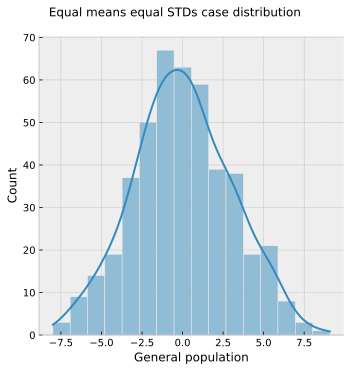

In [ ]:
plot_histogram(gp_emes, "Equal means equal STDs case distribution")

Boxplots for sample mean:

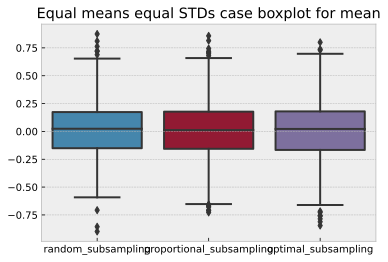

In [ ]:
plot_mean_boxplot(gp_emes, N_SUBSAMPLE, "Equal means equal STDs case boxplot for mean")

We see that all lines practically coincide. The quartiles and interquartile range are almost the same. Thus, with equal means and equal STDs of strata, there is no profit from stratification.

**General population with DIFFERENT means and EQUAL STDs of strata**  
Distribution histogram:

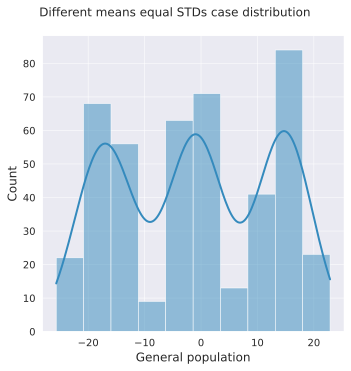

In [ ]:
plot_histogram(gp_dmes, "Different means equal STDs case distribution")

Boxplots for sample mean:

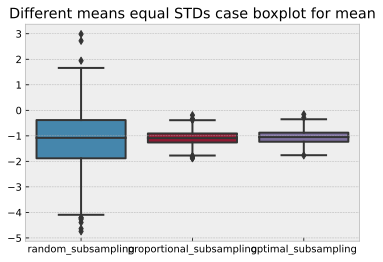

In [ ]:
plot_mean_boxplot(gp_dmes, N_SUBSAMPLE, "Different means equal STDs case boxplot for mean")

The interquartile range for proportional and optimal sampling is much smaller compared to simple random sampling, and the distance between the whiskers is reduced. With different means, we get benefit from stratification: we can reduce the scatter of estimates.

**General population with DIFFERENT means and DIFFERENT STDs of strata**  
Distribution histogram:

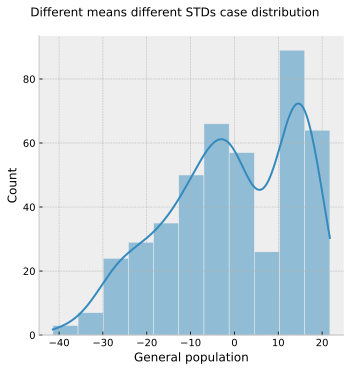

In [ ]:
plot_histogram(gp_dmds, "Different means different STDs case distribution")

Boxplots for sample mean:

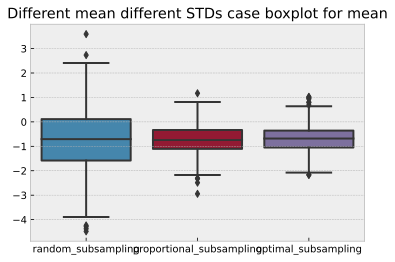

In [ ]:
plot_mean_boxplot(gp_dmds, N_SUBSAMPLE, "Different mean different STDs case boxplot for mean")

The interquartile ranges for proportional and optimal sampling are smaller than the interquartile range for simple random sampling. We see that the interquartile range for optimal sampling is smaller than for proportional sampling. Similarly, the length of the whiskers is smaller for the optimal sampling than for the proportional sampling. Thus, if variances are known, it is possible to reduce the scatter by taking the data so that variances differ.

With the experiments conducted and statistics estimated we can generate these <b>conclusions</b>:

If the variances are not known, proportional sampling should be used if the strata have different means. If the variances are known, to build estimates, the mean must be divided into such strata that the means and the STDs are different.

# Task 2



### Part 1
Using [this criteria](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.&text=If%20both%20variables%20tend%20to,represents%20the%20correlation%20slopes%20upward.), check whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. Also check it for men and women subsamples separately.


### Part 2
Using $Chi^2$ criteria check whether there is a statistical difference between men's and women's choice of auto.  (Features `Sex` и `PreferCar`)


You can download dataset using the following:

In [ ]:
pip install bds-courseware

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS
brain_data = read_drive_dataset(*HOMEWORK_DATASETS['brain'])  # PART 1
cars_prefes_data = read_drive_dataset(*HOMEWORK_DATASETS['car_perfs'])  # PART 2

##Part 1

In [ ]:
brain_data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545


Let’s first check out the number of people and the number of features:

In [ ]:
brain_data.shape

(40, 7)

There are 40 people and 7 features.

We can check what these features are and see if there are any missing values:

In [ ]:
print(brain_data.isnull().sum())

Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       0
Height       0
MRI_Count    0
dtype: int64


Counts for the two categories of 'Gender':

In [ ]:
brain_data['Gender'].value_counts()

Female    20
Male      20
Name: Gender, dtype: int64

###Checking whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects

Let's formulate null hypothesis $H_0$: there is a correlation between a brain size (MRI_Count) and intelligence (FSIQ, VIQ or PIQ).
And the alternative hypothesis $H_1$: there is no correlation between a brain size and intelligence.
Let the significance level $\alpha$ be equal to 0.05.

First we can plot dependencies between `MRI_Count` and each of the features that represent intelligence.

In [ ]:
intelligence_features = ['FSIQ', 'VIQ', 'PIQ']

def plot_feature(df, x, y):
  sns.scatterplot(data=df, x=x, y=y).set(title=f'{x} and {y} dependency')
  plt.show()

def plot_all_features(df):
  for feature in intelligence_features:
    plot_feature(df, 'MRI_Count', feature)

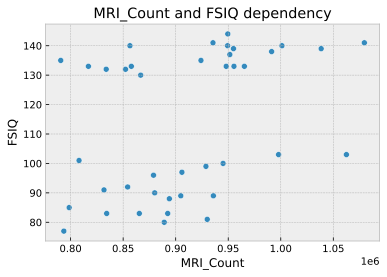

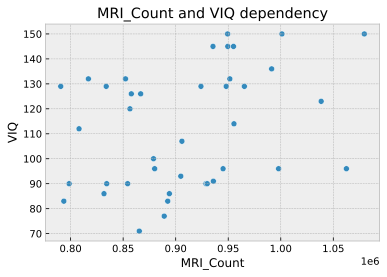

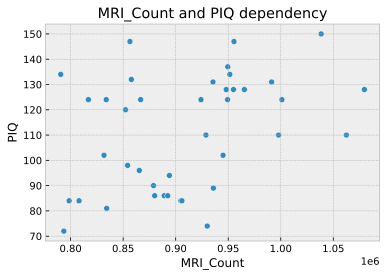

In [ ]:
plot_all_features(brain_data)

The resulting plots don't seem to indicate high correlation.

We can compute Pearson correlation coefficient and probability significance value using `st.pearsonr` since our features are numeric.

In [ ]:
def pearson_feature(x, y):
  r, p = st.pearsonr(x, y)

  print('\n')
  print(f'The pearson correlation coefficient for {y.name} is:', r)
  print(f'The p-value for {y.name} is:', p)

def pearson_all_features(df):
  print('Checking the correlation:')
  for feature in intelligence_features:
    pearson_feature(df['MRI_Count'], df[feature])

In [ ]:
pearson_all_features(brain_data)

Checking the correlation:


The pearson correlation coefficient for FSIQ is: 0.35764096936905665
The p-value for FSIQ is: 0.02346891262690166


The pearson correlation coefficient for VIQ is: 0.33747772802033543
The p-value for VIQ is: 0.033201762692926864


The pearson correlation coefficient for PIQ is: 0.3868173150245029
The p-value for PIQ is: 0.01367463603607323


Since all p-values are less than 0.05, therefore null hypothesis is rejected, alternatine hyposesis is accepted. Also, received correlation coefficients indicate a weak relation between features.

###Checking whether there is a correlation between a brain size and intelligence for a dataset for men and women subsamples

First let's create two subsamples, dividing sample data by gender.

In [ ]:
brain_data_men = brain_data[brain_data["Gender"] == "Male"]
brain_data_women = brain_data[brain_data["Gender"] == "Female"]

####Checking whether there is a correlation between a brain size and intelligence for a dataset for men subsample

We'll use the same functions as we created before for plotting and calculation the correlation coefficient.

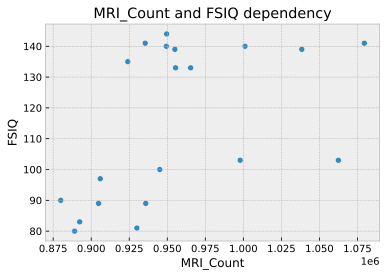

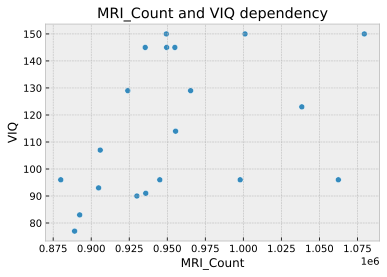

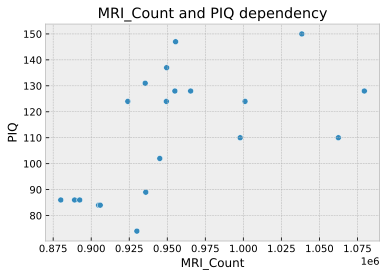

In [ ]:
plot_all_features(brain_data_men)

It seems these plots may show weak correlation.

In [ ]:
pearson_all_features(brain_data_men)

Checking the correlation:


The pearson correlation coefficient for FSIQ is: 0.49836911041719256
The p-value for FSIQ is: 0.025319401349742674


The pearson correlation coefficient for VIQ is: 0.4131049601428286
The p-value for VIQ is: 0.0702406382764465


The pearson correlation coefficient for PIQ is: 0.5682370032144156
The p-value for PIQ is: 0.008949874911640737


Since p-value for VIQ is greater than 0.05, therefore null hypothesis is accepted. Also, received correlation coefficients indicate a weak relation between features.

####Checking whether there is a correlation between a brain size and intelligence for a dataset for women subsample

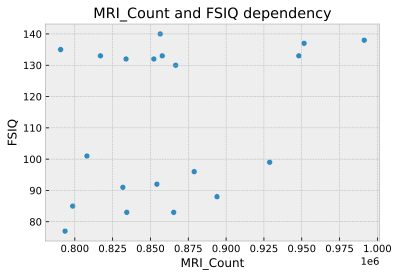

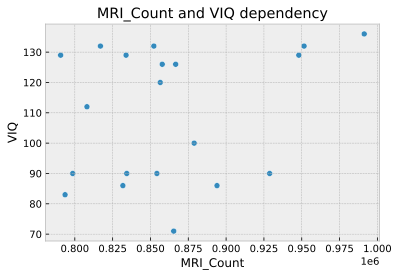

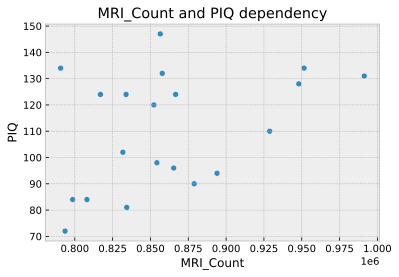

In [ ]:
plot_all_features(brain_data_women)

In [ ]:
pearson_all_features(brain_data_women)

Checking the correlation:


The pearson correlation coefficient for FSIQ is: 0.3256967004963704
The p-value for FSIQ is: 0.1611157761890763


The pearson correlation coefficient for VIQ is: 0.2549328529614766
The p-value for VIQ is: 0.27803963279018523


The pearson correlation coefficient for PIQ is: 0.39615716686847646
The p-value for PIQ is: 0.08378071936817734


Since p-values are greater than 0.05, therefore null hypothesis is accepted. Also, received correlation coefficients indicate a weak relation between features.

##Part 2

In [ ]:
cars_prefes_data.head().T

,0,1,2,3,4
ID,110,111,112,113,114
Age,18,25,63,51,19
Sex,2,1,2,1,1
LicYr,0,8,46,35,2
LicMth,2,0,0,0,0
ActCar,3,1,3,3,2
Kids5,2,2,2,2,2
Kids6,2,2,2,2,2
PreferCar,2,1,3,2,2
Car15K,2,1,2,2,1


Let’s first check out the number of people and the number of features:

In [ ]:
cars_prefes_data.shape

(300, 22)

There are 300 people and 22 features.

We can check what these features are and see if there are any missing values:

In [ ]:
print(cars_prefes_data.isnull().sum())

ID           0
Age          0
Sex          0
LicYr        0
LicMth       0
ActCar       0
Kids5        0
Kids6        0
PreferCar    0
Car15K       0
Reason       0
Cost         0
Reliable     0
Perform      0
Fuel         0
Safety       0
AC/PS        0
Park         0
Room         0
Doors        0
Prestige     0
Colour       0
dtype: int64


###Checking whether there is a statistical difference between men's and women's choice of auto.

Counts for the two categories of 'Sex':

In [ ]:
cars_prefes_data['Sex'].value_counts()

2    150
1    150
Name: Sex, dtype: int64

Counts for the four categories of 'PreferCar':

In [ ]:
cars_prefes_data['PreferCar'].value_counts()

2    136
3     73
1     68
4     23
Name: PreferCar, dtype: int64

For each type of car, let's calculate the number of people who prefer it, dividing the sample by gender.

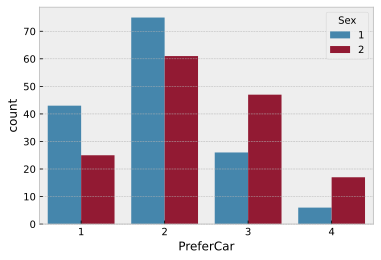

In [ ]:
hist = sns.countplot(data=cars_prefes_data, x="PreferCar", hue="Sex")

It seems that car3 and car4 are preferred mainly by representatives of gender '2' while car1 and car2 is preferred mainly by representatives of gender '1'.

Let's formulate null hypothesis $H_0$: there is no difference between men's and women's choice of auto.
And the alternative hypothesis $H_1$: there is a difference between men's and women's choice of auto.
Let the significance level $\alpha$ be equal to 0.05.

In order to compute the Chi-square test statistic, we need to construct a contingency table.

In [ ]:
crosstab = pd.crosstab(cars_prefes_data["Sex"], cars_prefes_data["PreferCar"])
crosstab

PreferCar,1,2,3,4
Sex,,,,
1,43,75,26,6
2,25,61,47,17


We can compute the chi-square statistic and p-value for the hypothesis test using `chi2_contingency` and passing our contingency table as a parameter.

In [ ]:
st.chi2_contingency(crosstab)

(17.507847808569526, 0.0005555699275518034, 3, array([[34. , 68. , 36.5, 11.5],
        [34. , 68. , 36.5, 11.5]]))

Since `p-value` (`0.0005555699275518034`) is smaller than 0.05, therefore null hypothesis is rejected and alternative hypothesis is accepted. Our experiment shows there is a difference between women's and men's choice of auto.

# Task 3

You can find and download a dataset there:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


1) For any country (you are free to choose any of the presented)
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [ ]:
df = pd.read_csv('/content/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Let’s check out the number of rows and the number of features:

In [ ]:
df.shape

(27820, 12)

There are 27820 records and 12 features.

We can check what these features are and see if there are any missing values:

In [ ]:
print(df.isnull().sum())

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


`HDI for year` is equal to null in most cases.

##Part 1

We can check what countries have the most suicides.

In [ ]:
df.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).head(10)

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64

Let's take the United Kingdom for our experiment.

In [ ]:
uk_df = df[df['country'] == 'United Kingdom']
uk_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26476,United Kingdom,1985,male,75+ years,264,1202838,21.95,United Kingdom1985,0.753,"489,285,164,271",9231,G.I. Generation
26477,United Kingdom,1985,male,55-74 years,915,5170113,17.70,United Kingdom1985,0.753,"489,285,164,271",9231,G.I. Generation
26478,United Kingdom,1985,male,35-54 years,1208,6899879,17.51,United Kingdom1985,0.753,"489,285,164,271",9231,Silent
26479,United Kingdom,1985,male,25-34 years,620,3969689,15.62,United Kingdom1985,0.753,"489,285,164,271",9231,Boomers
26480,United Kingdom,1985,female,55-74 years,678,6002096,11.30,United Kingdom1985,0.753,"489,285,164,271",9231,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
26843,United Kingdom,2015,female,25-34 years,181,4414464,4.10,United Kingdom2015,NaN,"2,885,570,309,161",47240,Millenials
26844,United Kingdom,2015,female,75+ years,108,3070457,3.52,United Kingdom2015,NaN,"2,885,570,309,161",47240,Silent
26845,United Kingdom,2015,female,15-24 years,104,3966564,2.62,United Kingdom2015,NaN,"2,885,570,309,161",47240,Millenials
26846,United Kingdom,2015,female,5-14 years,6,3663221,0.16,United Kingdom2015,NaN,"2,885,570,309,161",47240,Generation Z


Here is a function for plotting bar charts.

In [ ]:
def plot_bar_suicides(x, order, hue):
  sns.set_style('darkgrid')
  plt.figure(figsize=(10,6))
  plot = sns.barplot(data=uk_df, x=x, y="suicides_no", ci = None, order=order, hue=hue)
  plot.set_title(f"Numbers of suicides by {x}")
  plot.tick_params(axis='x', rotation=90)
  plt.show()

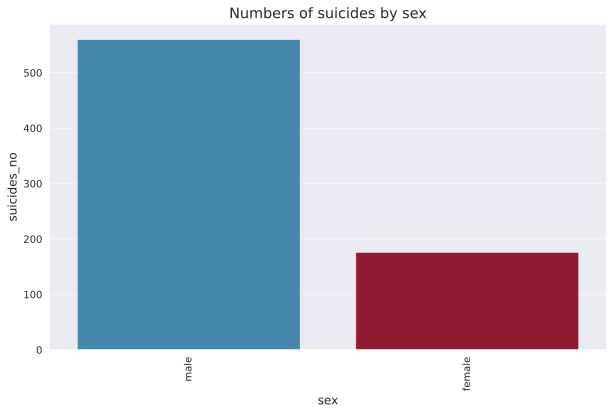

In [ ]:
plot_bar_suicides("sex", None, hue=None)

I'd like to arrange the age periods on the plot.

In [ ]:
uk_df['age'] = uk_df['age'].str.replace("5-14 years","05-14 years")
ages = uk_df['age'].unique()
ages.sort()

<ipython-input-43-848966878997>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_df['age'] = uk_df['age'].str.replace("5-14 years","05-14 years")


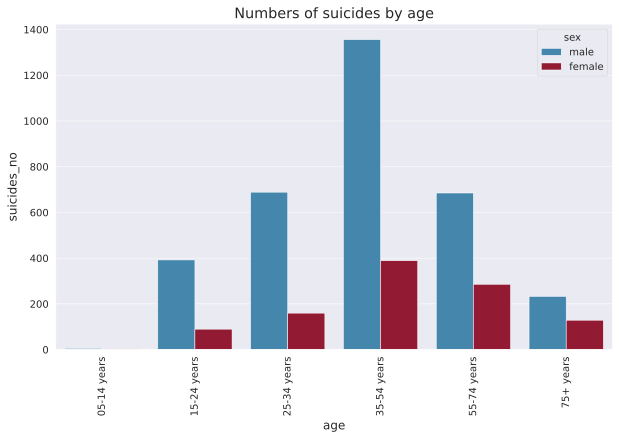

In [ ]:
plot_bar_suicides("age", order=ages, hue='sex')

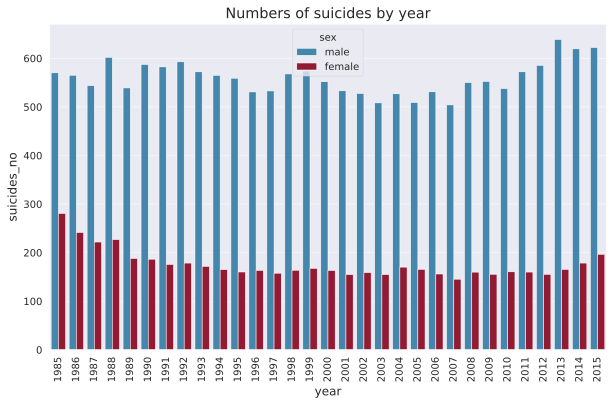

In [ ]:
plot_bar_suicides("year", None, hue='sex')

Based on our results, we see that in all age groups and in all years, the number of suicides among male victims is higher than among female victims. We can assume that people of certain sex (men) are more prone to suicides. However, there is a possibility that proportion between female and male victims is different depending on counrty, for example. And it has to be considered in the overal dataset since the lack of this information can end up to bias in the researches.

We can take an additional feature (`year`) to make crosstab and use `chi2_contingency`. So $H_0$: there is a connection between suicidal tendencies of different genders and years. $H_1$: there is no connection between suicidal tendencies of different genders and years. α=0.05

In [ ]:
crosstab = pd.crosstab(index=uk_df["sex"], columns=uk_df['year'], values=uk_df['suicides_no'], aggfunc = 'sum')
crosstab

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
sex,,,,,,,,,,,,,,,,,,,,,
female,1684,1448,1331,1360,1127,1119,1053,1071,1029,990,...,936,872,959,933,963,960,932,993,1071,1178
male,3421,3391,3263,3611,3234,3524,3494,3557,3433,3390,...,3186,3025,3300,3313,3225,3433,3512,3831,3717,3732


In [ ]:
st.chi2_contingency(crosstab)

(563.1253971535288,
 1.2433182293321739e-99,
 30,
 array([[1219.74441724, 1156.18868462, 1097.65050985, 1187.7276196 ,
         1041.97951098, 1109.3581448 , 1086.42073755, 1105.77417492,
         1066.11157487, 1046.51920617, 1030.98867   ,  995.14897116,
          989.892482  , 1048.6695881 , 1062.76653631, 1025.01538686,
          986.30851212,  983.68026753,  950.7077446 ,  999.44973502,
          966.95507474,  984.87492416,  931.1153759 , 1017.60851577,
         1014.50240854, 1000.64439165, 1049.6253134 , 1061.81081101,
         1152.60471474, 1144.00318702, 1173.15280874],
        [3885.25558276, 3682.81131538, 3496.34949015, 3783.2723804 ,
         3319.02048902, 3533.6418552 , 3460.57926245, 3522.22582508,
         3395.88842513, 3333.48079383, 3284.01133   , 3169.85102884,
         3153.107518  , 3340.3304119 , 3385.23346369, 3264.98461314,
         3141.69148788, 3133.31973247, 3028.2922554 , 3183.55026498,
         3080.04492526, 3137.12507584, 2965.8846241 , 3241.39148423

`p-value` is less than the significance level so null hypothesis is rejected.

##Part 2

In [ ]:
df_2016 = df[df['year'] == 2016][['country', 'suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']].reset_index()
df_2016 = df_2016.sort_values('gdp_per_capita ($)')
df_2016.head(10)

,index,country,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,1248,Armenia,12,61956,19.37,3788
8,1256,Armenia,2,277452,0.72,3788
7,1255,Armenia,3,408109,0.74,3788
6,1254,Armenia,4,255665,1.56,3788
5,1253,Armenia,6,308349,1.95,3788
9,1257,Armenia,1,195422,0.51,3788
3,1251,Armenia,5,202220,2.47,3788
2,1250,Armenia,16,350633,4.56,3788
1,1249,Armenia,16,237813,6.73,3788
4,1252,Armenia,2,102414,1.95,3788


Let's visualize the feature `gdp_per_capita ($)`.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


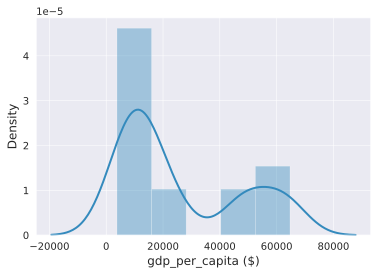

In [ ]:
sns.distplot(df_2016['gdp_per_capita ($)'])

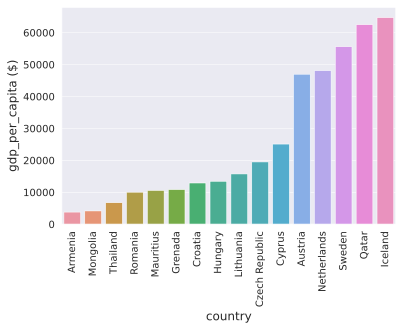

In [ ]:
plot = sns.barplot(data=df_2016, x='country', y="gdp_per_capita ($)", ci = None)
plot.tick_params(axis='x', rotation=90)
plt.show()

I'd like to aggregate data records by countries. Since there are several records for each country according to different genders and age periods, to take into account data proportionally to population, I'll count value for `suicides/100k pop` using the features `suicides_no` and `population`.

In [ ]:
grouped_by_countries = df_2016.groupby('country', as_index=False).agg(
    suicides_no_total=('suicides_no', 'sum'),
    population_total=('population', 'sum'),
    gdp_per_capita_mean=('gdp_per_capita ($)', 'mean')
).sort_values('gdp_per_capita_mean')

grouped_by_countries['suicides/100k pop'] = grouped_by_countries['suicides_no_total'] * 100000 / grouped_by_countries['population_total']

grouped_by_countries

,country,suicides_no_total,population_total,gdp_per_capita_mean,suicides/100k pop
0,Armenia,67,2400033,3788.0,2.791628
10,Mongolia,423,2167589,4145.0,19.514770
15,Thailand,4117,53442001,6713.0,7.703679
13,Romania,1953,16644905,10020.0,11.733320
9,Mauritius,98,992432,10570.0,9.874732
5,Grenada,0,79012,10838.0,0.000000
2,Croatia,683,3567043,12905.0,19.147512
6,Hungary,1761,8390370,13448.0,20.988347
8,Lithuania,822,2445296,15742.0,33.615562
4,Czech Republic,1318,8929942,19505.0,14.759334


Let's divide our countries into 3 grops:
1) Armenia, Mongolia, Thailand, Romania, Mauritus, Grenada,
2) Croatia, Hungary Lithuania, Czech Republic, Cyprus,
3) Austria, Neitherlands, Sweden, Qatar, Iceland

In [ ]:
grouped_by_countries['gdp_per_capita_mean_group'] = pd.qcut(grouped_by_countries['gdp_per_capita_mean'].sort_values(), [0, 0.35, 0.7, 1], labels=[1, 2, 3])
grouped_by_countries

,country,suicides_no_total,population_total,gdp_per_capita_mean,suicides/100k pop,gdp_per_capita_mean_group
0,Armenia,67,2400033,3788.0,2.791628,1
10,Mongolia,423,2167589,4145.0,19.514770,1
15,Thailand,4117,53442001,6713.0,7.703679,1
13,Romania,1953,16644905,10020.0,11.733320,1
9,Mauritius,98,992432,10570.0,9.874732,1
5,Grenada,0,79012,10838.0,0.000000,1
2,Croatia,683,3567043,12905.0,19.147512,2
6,Hungary,1761,8390370,13448.0,20.988347,2
8,Lithuania,822,2445296,15742.0,33.615562,2
4,Czech Republic,1318,8929942,19505.0,14.759334,2


In [ ]:
grouped_by_gdp = grouped_by_countries.groupby('gdp_per_capita_mean_group').mean()['suicides/100k pop']
grouped_by_gdp

gdp_per_capita_mean_group
1     8.603021
2    18.714320
3    12.230456
Name: suicides/100k pop, dtype: float64

We see different `suicides/100,000 population` in different groups.

Let's formulate null hypothesis $H_0$: the `suicides / 100k pop` indicator doesn't differ in these groups $H_1$: the `suicides / 100k pop` indicator differs in these groups.
Let the significance level $\alpha$ be equal to 0.05.

In [ ]:
group1 = grouped_by_countries[grouped_by_countries['gdp_per_capita_mean_group'] == 1]['suicides/100k pop']
group2 = grouped_by_countries[grouped_by_countries['gdp_per_capita_mean_group'] == 2]['suicides/100k pop']
group3 = grouped_by_countries[grouped_by_countries['gdp_per_capita_mean_group'] == 3]['suicides/100k pop']

We can conduct a One-Way ANOVA test. First let's check our data for normality.

In [ ]:
st.shapiro(group1), \
st.shapiro(group2), \
st.shapiro(group3)

(ShapiroResult(statistic=0.9726409912109375, pvalue=0.9096826314926147),
 ShapiroResult(statistic=0.976827085018158, pvalue=0.9169754981994629),
 ShapiroResult(statistic=0.7440769076347351, pvalue=0.026207804679870605))

One of `p-values` is smaller than the significance level so we can't say that samples come from populations that follow normal distribution.

Let's check that all input samples are from populations with equal variances.

In [ ]:
st.levene(group1, group2, group3)

LeveneResult(statistic=0.7533062893962637, pvalue=0.49028962967566403)

`p-value` is greater than 0.05, therefore we can say the samples come from populations with the same variance.

According to the fact that one of samples failed the test for normality, we can't conduct ANOVA test. Instead we can use Kruskal-Wallis H-test to check if the population median of all of the groups are equal.

In [ ]:
st.kruskal(group1, group2, group3)

KruskalResult(statistic=4.0044117647058854, pvalue=0.13503707854674193)

Since `p-value` is bigger than 0.05, therefore null hypothesis is accepted. The `suicides / 100k pop` indicator doesn't differ in the groups.

It can be assumed that the partition of data into such groups depending on `gdp_per_capita_mean` is not of great importance for determining suicidal tendencies. We can see, for example, that Qatar and Iceland have close values of `gdp_per_capita_mean` and are in the same group but their `suicides/100k pop` are very differ.